# Introduction to unsupervised learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


## Setup:
Here we will load necessary libraries

In [1]:
# The three giants on which everything else is built
import numpy as np
import pandas as pd

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

# Curse of dimensionality

Here we will illustrate how increasing the dimensionality of your data (adding more features) may impact the performance of the machine learning model.

We generate 100 points from 1000 dimensional Gaussian distribution. Fifty points are generated from a distribution centered at 1 and another fifty from a distribution with a centre in 0.

Here is how these two Gaussians look like in 1D: 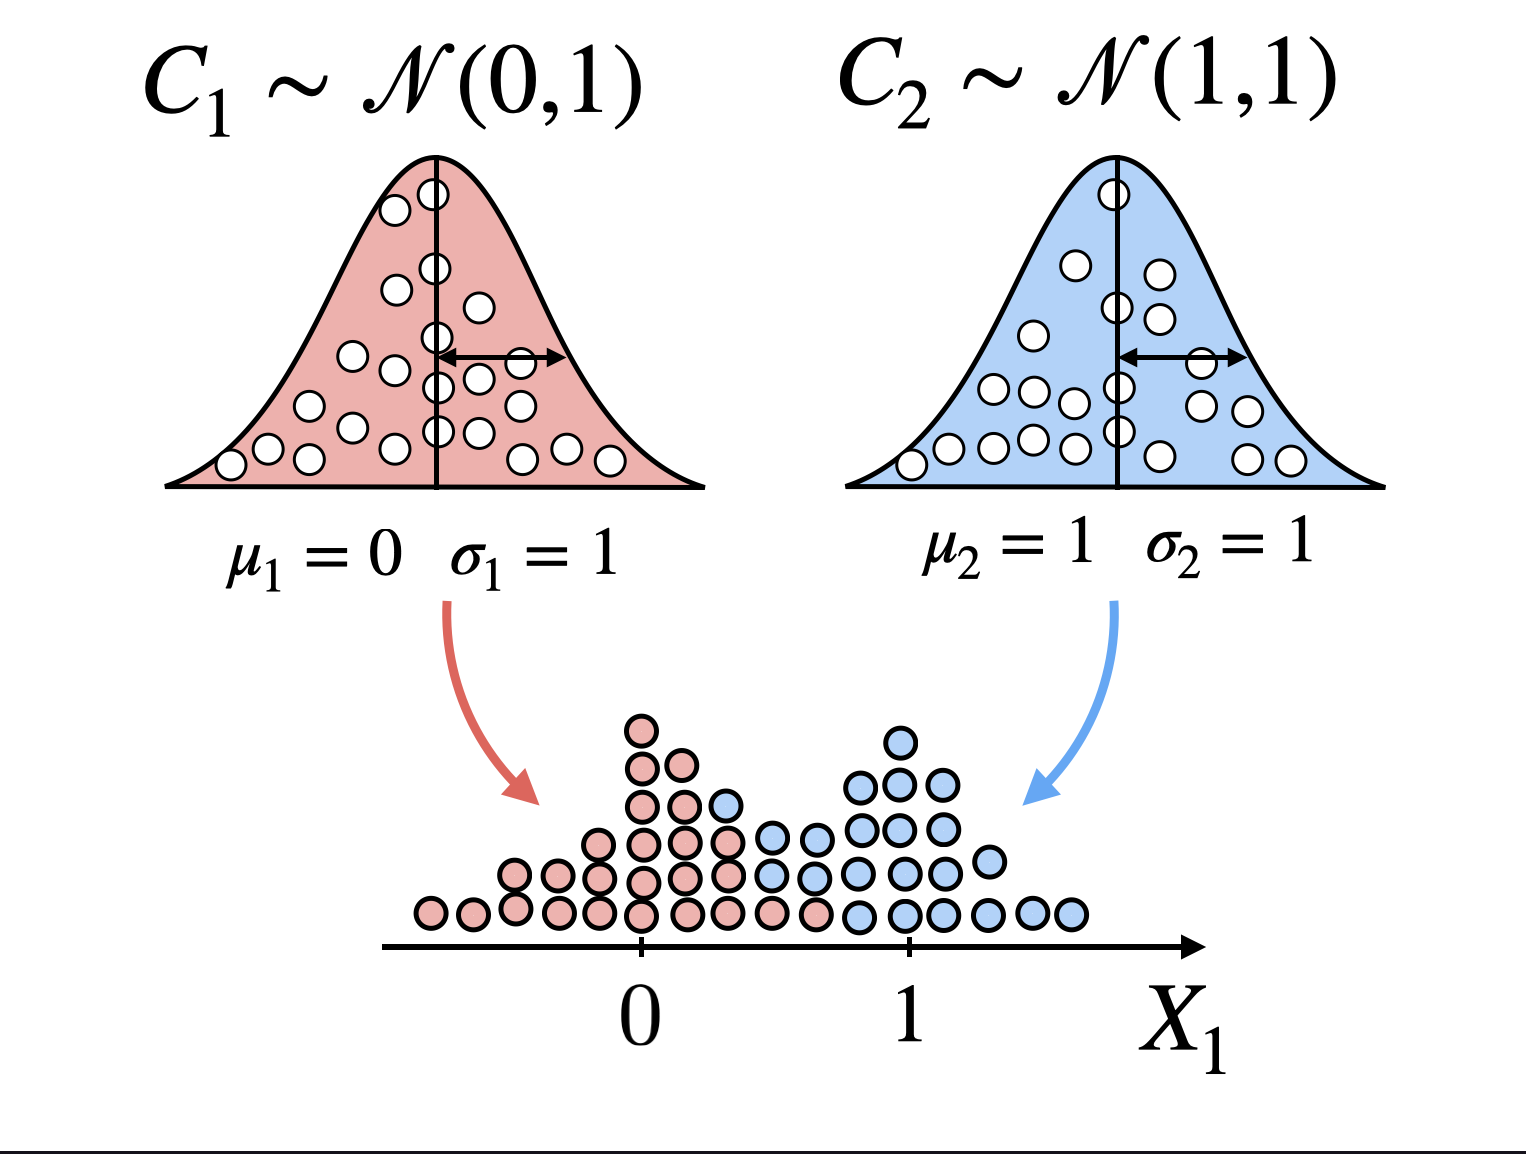

In [2]:
np.random.seed(2342347823) # random seed for consistency

D = 1000
num_points = 50

# Generating 50 points for the first class
mu_vec1 = np.zeros(D)  # Vector of means for each dimension
cov_mat1 = np.eye(D)   # creates a diagonal matrix of size D x D, all values except diagonal are 0
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, num_points)

# Generating 50 points for the second class
mu_vec2 = np.ones(D) # this is the only difference with the previous matrix
cov_mat2 = np.eye(D)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, num_points)

In [3]:
print(class1_sample.shape)
print(class2_sample.shape)

(50, 1000)
(50, 1000)


Combine two samples together into one dataset

In [4]:
data = np.concatenate((class1_sample, class2_sample), axis=0)
train_data = pd.DataFrame(data)
train_data.shape

(100, 1000)

In [5]:
# Create names for columns, x1, x2 ... x1000
train_data.columns = [f'x{i}' for i in np.arange(D) + 1]
train_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,x1000
0,0.747677,-1.607201,1.522674,-0.319540,0.752203,1.557956,-0.463461,-0.669275,0.473778,0.739542,...,-0.648145,1.276013,0.686944,-0.072270,-0.479747,0.982544,3.025926,1.057445,-0.672722,0.951714
1,-0.574084,0.570199,1.049493,0.299894,-0.016347,-0.870726,-0.328953,0.558206,0.240589,0.096518,...,0.841633,0.543399,-0.182353,-2.119986,-1.260079,0.223613,-0.245338,1.138072,0.830277,0.799083
2,0.778231,0.713515,-0.520362,2.484827,-0.232662,-0.020405,-0.789167,-2.121834,-1.475452,-1.820389,...,1.138131,-0.431671,0.783384,-1.584360,-0.896578,-0.797718,-1.411630,1.714866,-0.205432,-2.130929
3,1.655555,1.112613,-0.252042,-0.170726,0.138296,-0.227334,-0.079528,0.614816,-0.743745,-0.902144,...,-0.102489,0.226351,0.507109,-0.910010,-0.740115,1.309196,-0.861141,0.774657,0.576873,0.345766
4,-0.165527,1.026656,0.776650,0.918807,0.258989,0.543266,-0.866992,-0.293333,-1.002930,-0.509592,...,-1.963759,-0.436557,0.334843,-0.853657,1.664926,-0.522813,0.287117,1.216694,-0.769198,-0.585464


In [6]:
# Create a class column
train_data['class'] = np.concatenate((np.repeat(0, num_points), np.repeat(1, num_points)))

# Cast class variable into categorical
# This is important for plotting and modelling
train_data['class'] = train_data['class'].astype('category')
train_data.loc[:,['x1','x2','class']].head()

,x1,x2,class
0,0.747677,-1.607201,0
1,-0.574084,0.570199,0
2,0.778231,0.713515,0
3,1.655555,1.112613,0
4,-0.165527,1.026656,0


Let's take a look at the data we have generated (at least at its first two dimentions):

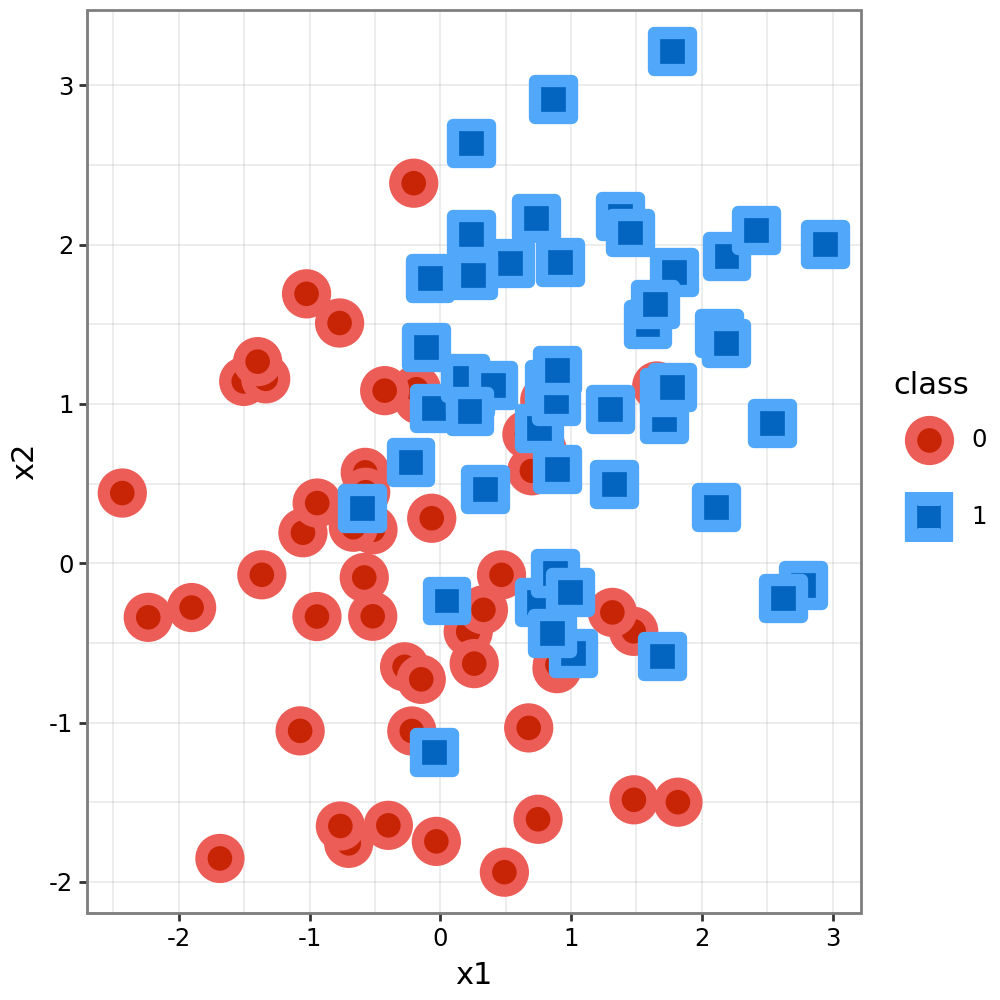

In [7]:
fig = (
    ggplot(data = train_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
)
fig

Divide this dataset into two sets: training set (60%) and validation set (40%). As we have done in the previous practice.

In [8]:
##### YOUR CODE STARTS #####
train = train_data[:int(len(train_data)*0.6)]
val = train_data[int(len(train_data)*0.6):]
##### YOUR CODE ENDS #####

In [9]:
print(train.shape)
print(val.shape)

(60, 1001)
(40, 1001)


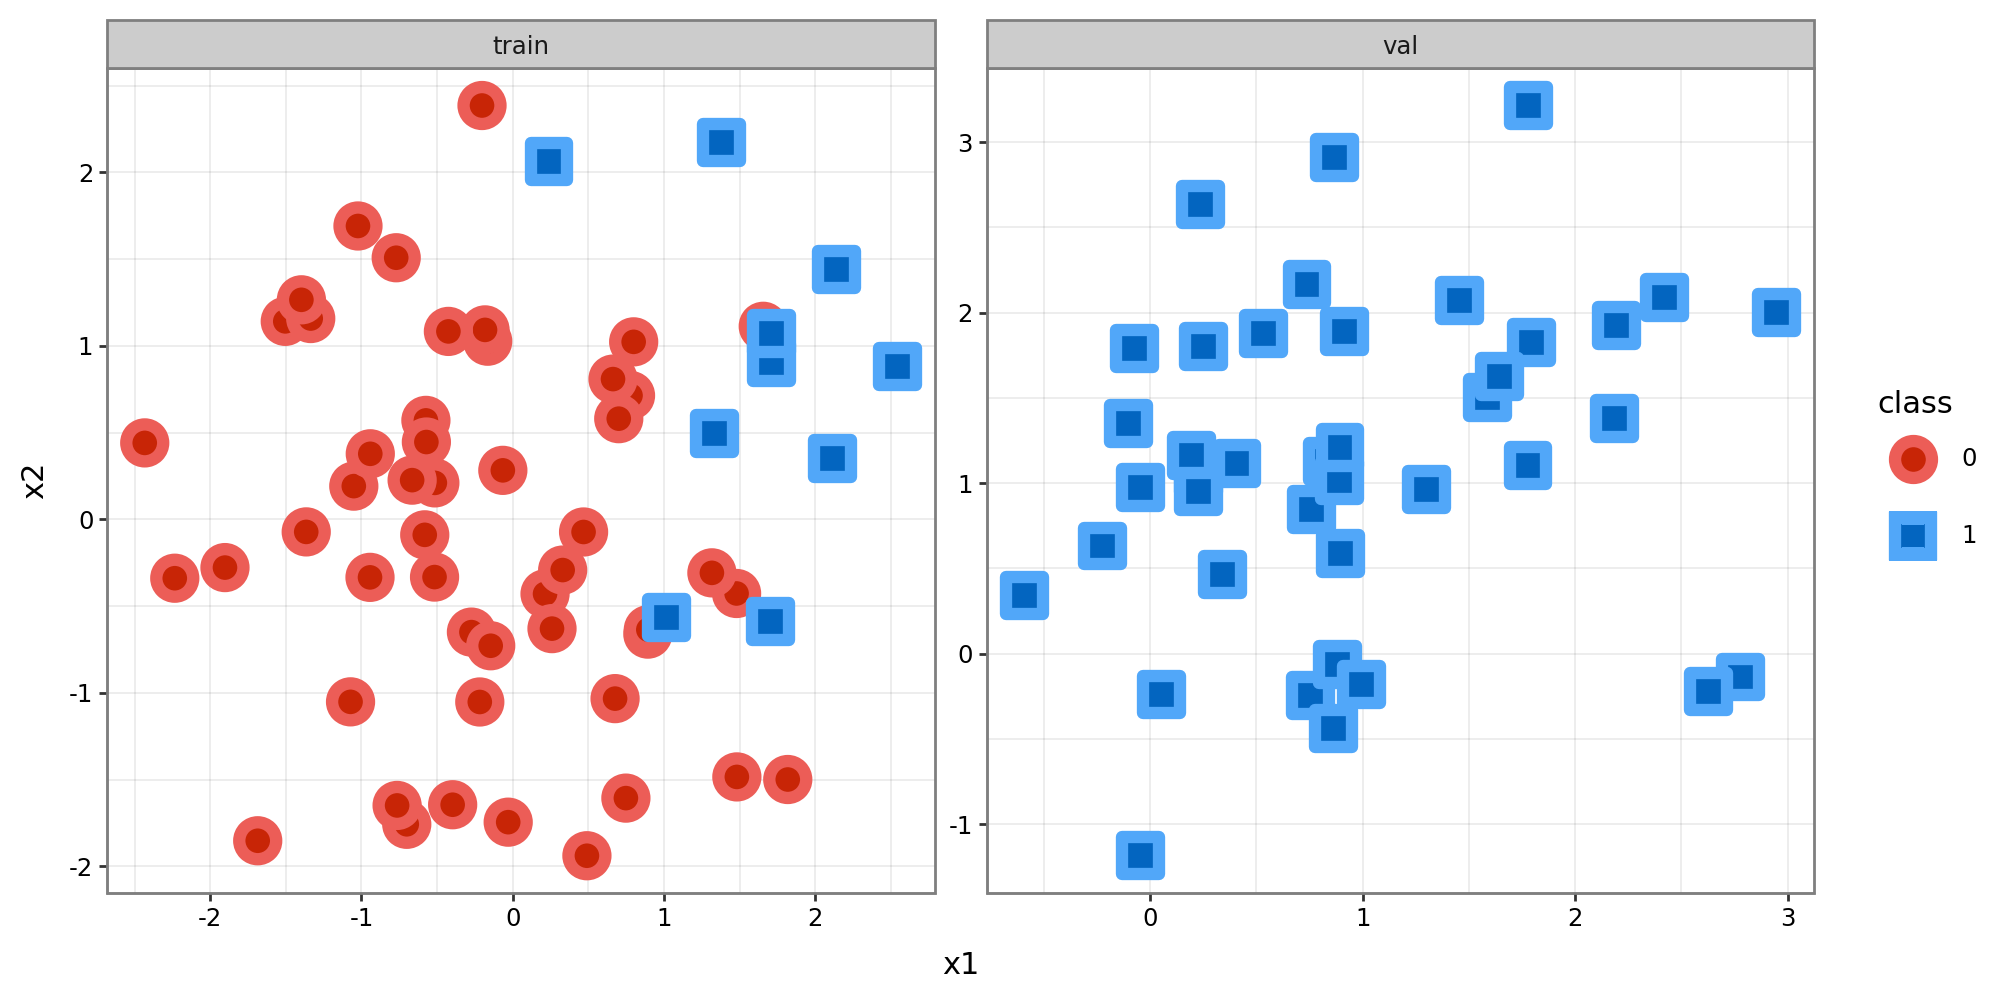

In [10]:
# Let's visualise training and validation data
vis_data = train_data
vis_data['subset'] = 'train'
vis_data['subset'][int(len(train_data)*0.6):] = 'val'
vis_data['subset'] = vis_data['subset'].astype('category')

fig = (
    ggplot(data = vis_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    facet_wrap('~subset', scales = 'free', ) +
    theme(figure_size = (10, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
)
fig

There are way more instances on the class 0 than instances of class 1. What is wrong?

In [11]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, test_size = 0.4, random_state = 111)

Visualise the training data again to make sure that now we managed to get balanced representation

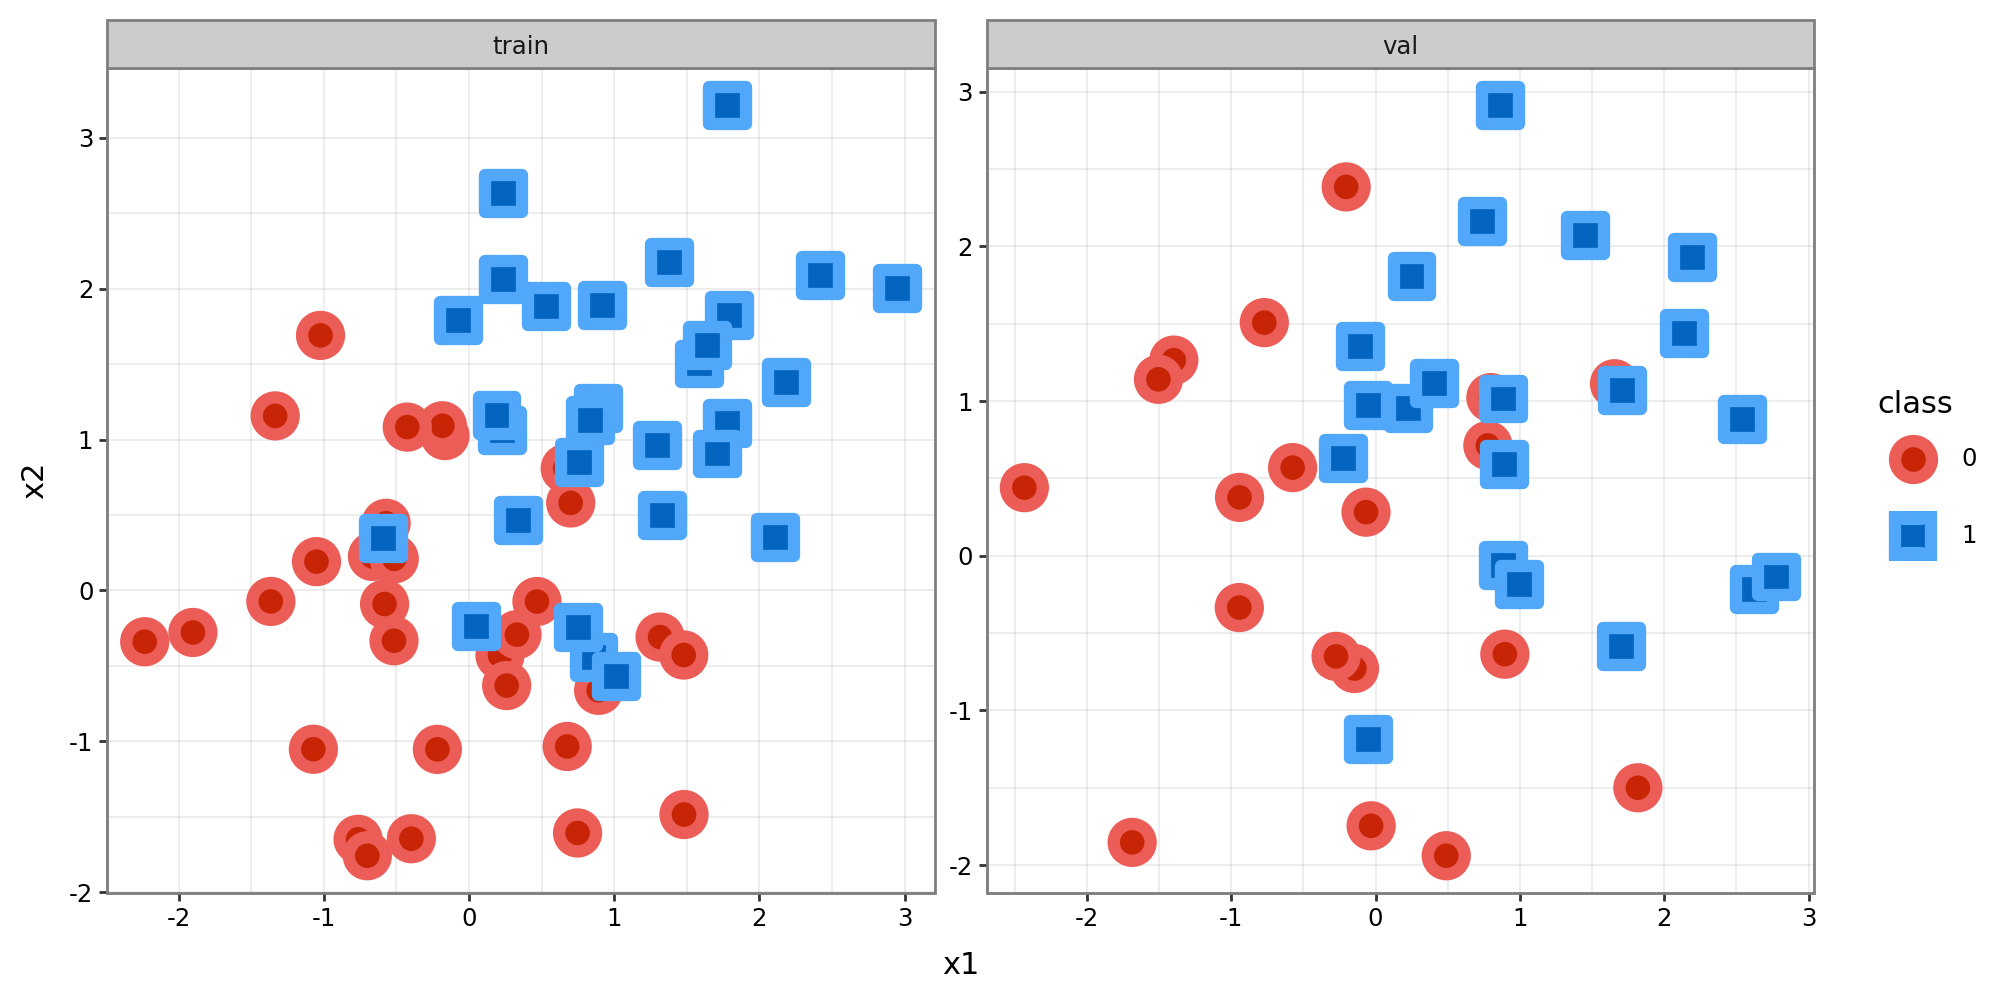

In [13]:
# Let's visualise new training and validation data
train['subset'] = 'train'
val['subset'] = 'val'

vis_data = pd.concat([train, val])
vis_data['subset'] = vis_data['subset'].astype('category')

fig = (
    ggplot(data = vis_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    facet_wrap('~subset', scales = 'free', ) +
    theme(figure_size = (10, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
)
fig

Well done!

Let's see how the Decision Tree algorithm can cope with this data. Let's import the Decision Tree (this time we will need classifier) from the `sklearn` package.


---


The **Decision Tree Classifier** is similar to the Decision Tree Regressor that we have seen in the previous sessions, except that instead of **MSE** it optimizes **accuracy** of the class assignment.

---

In [14]:
from sklearn.tree import DecisionTreeClassifier

Complete a function `train_and_evaluate_with_dim` that trains a DecisionTreeClassifier on `dim`-dimensional data and test it on validation data (*we shall not use CV algorithm in this case to save time*):

In [15]:
def train_and_evaluate_with_dim(train, val, dim = 2):
  np.random.seed(1111)
  dtree = DecisionTreeClassifier(max_depth = 5)
  dtree.fit(train.iloc[:, :dim], y = train['class'])

  ##### YOUR CODE STARTS #####
  val_predict = dtree.predict(val.iloc[:, :dim])
  val_accuracy = np.mean(val["class"] == val_predict)
  ##### YOUR CODE ENDS #####
  return val_accuracy

In [16]:
dims = [2, 5, 50, 1000]
for dim in dims:
    print(f"Validation accuracy for {dim} features is {train_and_evaluate_with_dim(train, val, dim) * 100}%")

Validation accuracy for 2 features is 80.0%
Validation accuracy for 5 features is 82.5%
Validation accuracy for 50 features is 72.5%
Validation accuracy for 1000 features is 67.5%


<font color=purple size=4>**Question**: What is going on here? Why does fewer features result in better performance?
</font>

# Principle Component Analysis (toy data)

PCA is one of the most common ways to reduce the dimensionality of the data. Here we will examine ways to build a PCA for a given toy dataset. If you are still struggling with eigenvectors and values theory, you can enjoy [this video](https://youtu.be/PFDu9oVAE-g).

Let's review the steps of PCA from the lecture.
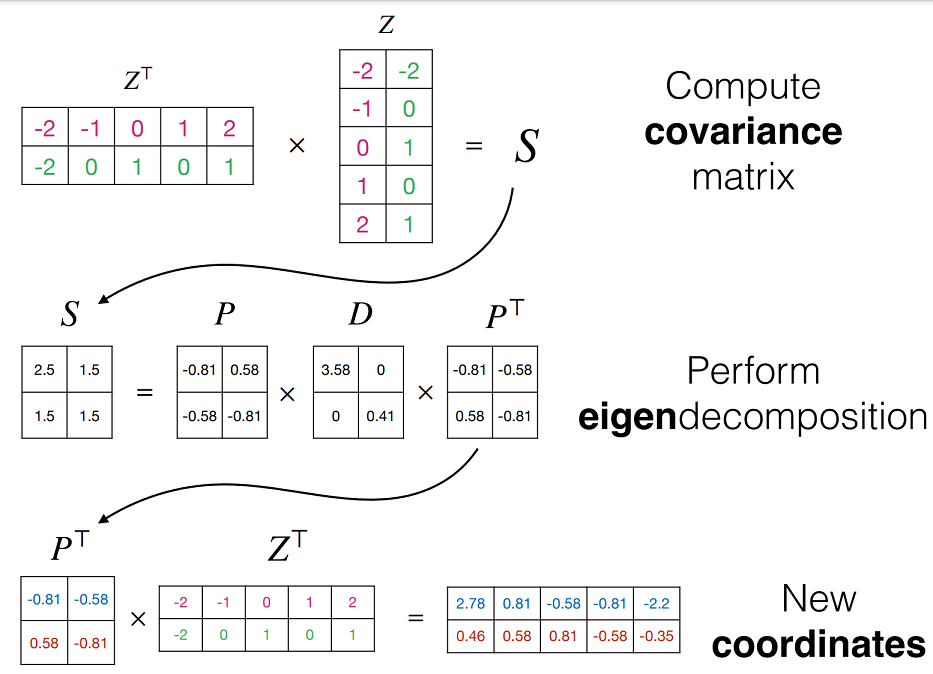


In [17]:
# Let's generate data from the lecture slides
Z = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]})

# Centering both features
Z.x = Z.x - Z.x.mean()
Z.y = Z.y - Z.y.mean()

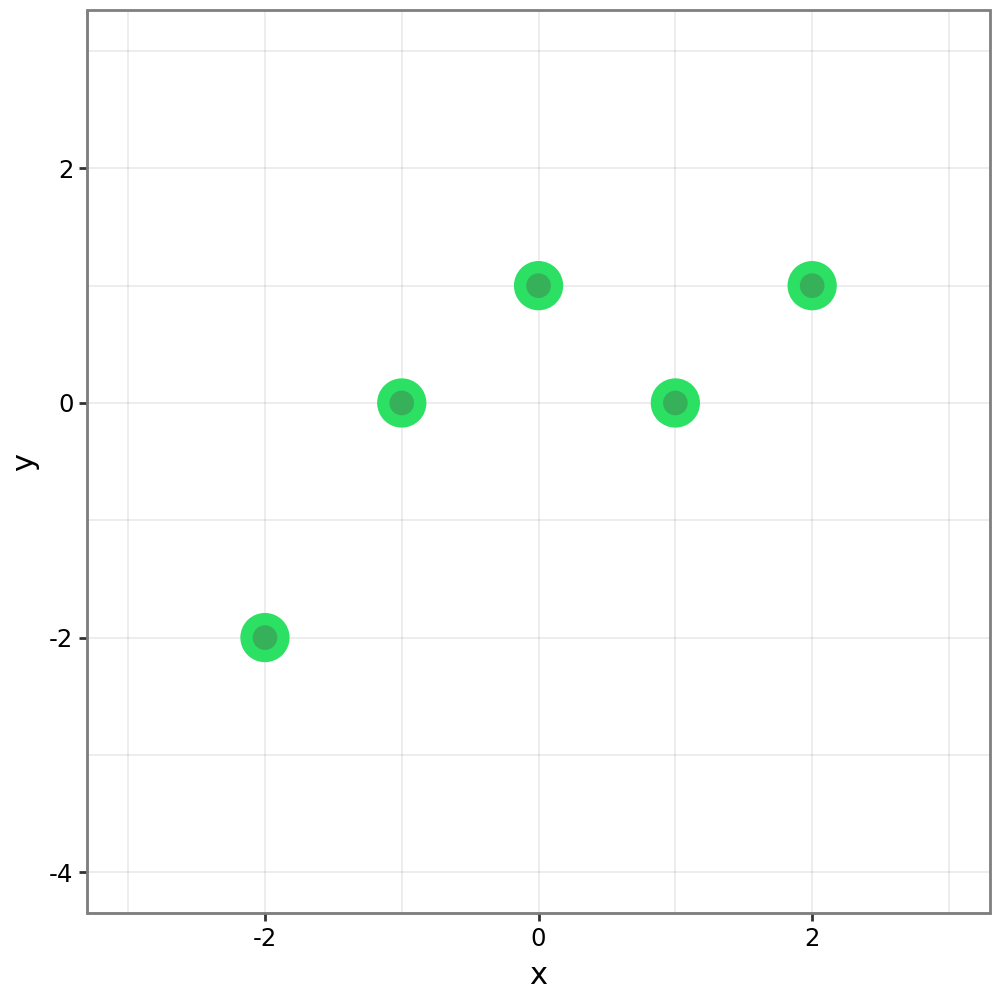

In [18]:
fig = (
    ggplot(data = Z,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Transpose the matrix of original coordinates

In [19]:
Z_t = Z.T
print('Original matrix Z:')
print(Z)
print('Transposed matrix Z.T:')
print(Z_t)

Original matrix Z:
     x    y
0 -2.0 -2.0
1 -1.0  0.0
2  0.0  1.0
3  1.0  0.0
4  2.0  1.0
Transposed matrix Z.T:
     0    1    2    3    4
x -2.0 -1.0  0.0  1.0  2.0
y -2.0  0.0  1.0  0.0  1.0


Compute [empirical covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix#Estimation) using the following formula: $$ S = \frac{1}{n - 1}Z^T Z $$
where $n$ is the number of observations.

In [28]:
##### YOUR CODE STARTS #####

# divide by the (number of observations - 1)
# @ is matrix multiplication operator in Python
S = (Z_t @ Z) / (len(Z)-1)

##### YOUR CODE ENDS #####
print(S)

     x    y
x  2.5  1.5
y  1.5  1.5


Perform eigendecomposition using `linalg.eig` function from `numpy`

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(S)

print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors (in columns):")
print(eigenvectors)

Eigenvalues:
[3.58113883 0.41886117]
Eigenvectors (in columns):
[[ 0.81124219 -0.58471028]
 [ 0.58471028  0.81124219]]


Let's visualise eigenvectors to remind ourselves their purpose. To do so, we need to draw two lines (one per each eigenvector), so that each lines passes through the origin (0,0) and a point with corrdinates of the vect

In [30]:
# Coordinates of the origin
x1 = 0
y1 = 0

# first vector
x2 = eigenvectors[0, 0]
y2 = eigenvectors[1, 0]
slope_1 = (y2 - y1) / (x2 - x1)
intercept_1 = y2 - slope_1 * x2

# second vector
x2 = eigenvectors[0, 1]
y2 = eigenvectors[1, 1]
slope_2 = (y2 - y1)/(x2 - x1)
intercept_2 = y2 - slope_2 * x2

In [31]:
Z

,x,y
0,-2.0,-2.0
1,-1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,2.0,1.0


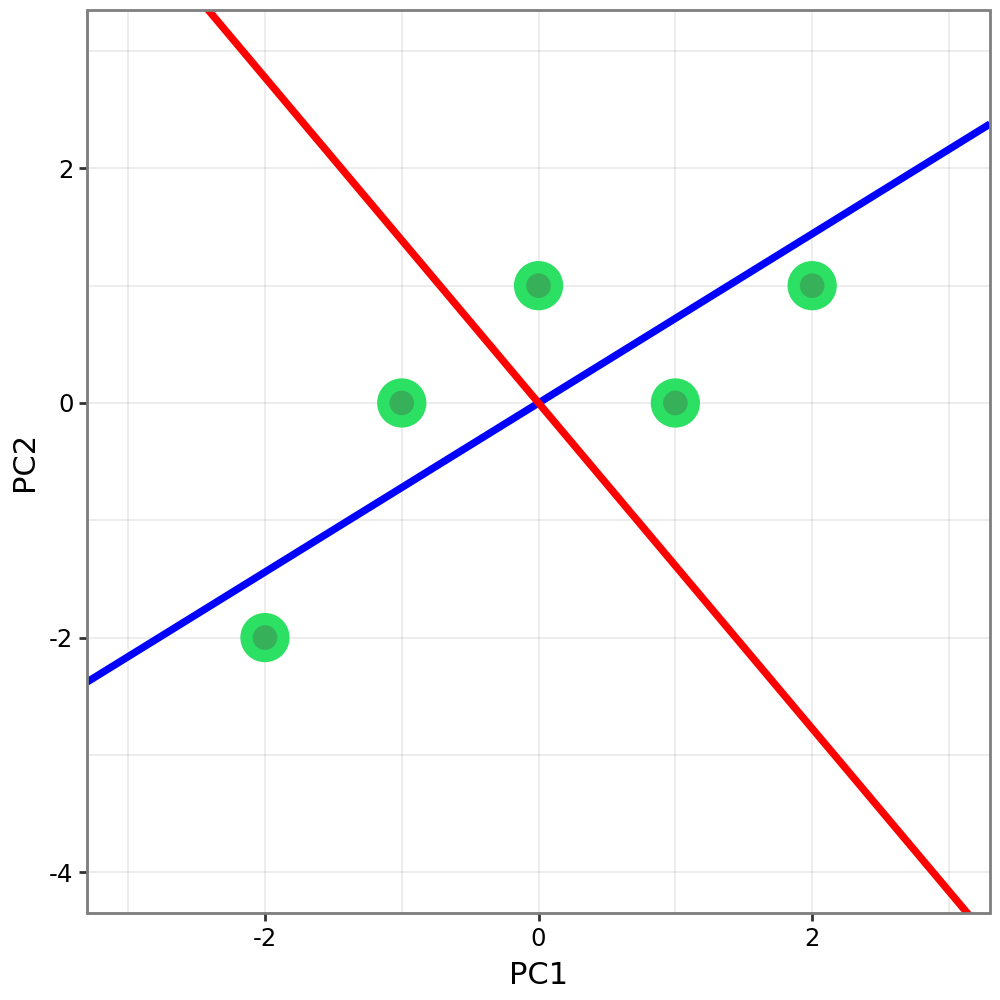

In [32]:
fig = (
    ggplot(data = Z,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    geom_abline(intercept=intercept_1, slope=slope_1, color="blue", size=1.5) +
    geom_abline(intercept=intercept_2, slope=slope_2, color="red", size=1.5) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Transform transposed matrix of original coordinates into the space of principle components.

In [33]:
Z_new = -eigenvectors.T @ Z_t
# we multiple by -1 just to make results look exactly like in lecture :)

# Make it actually look nice
Z_new_pd = Z_new.T
Z_new_pd.columns=["PC1","PC2"]
Z_new_pd

,PC1,PC2
0,2.791905,0.453064
1,0.811242,-0.584710
2,-0.584710,-0.811242
3,-0.811242,0.584710
4,-2.207195,0.358178


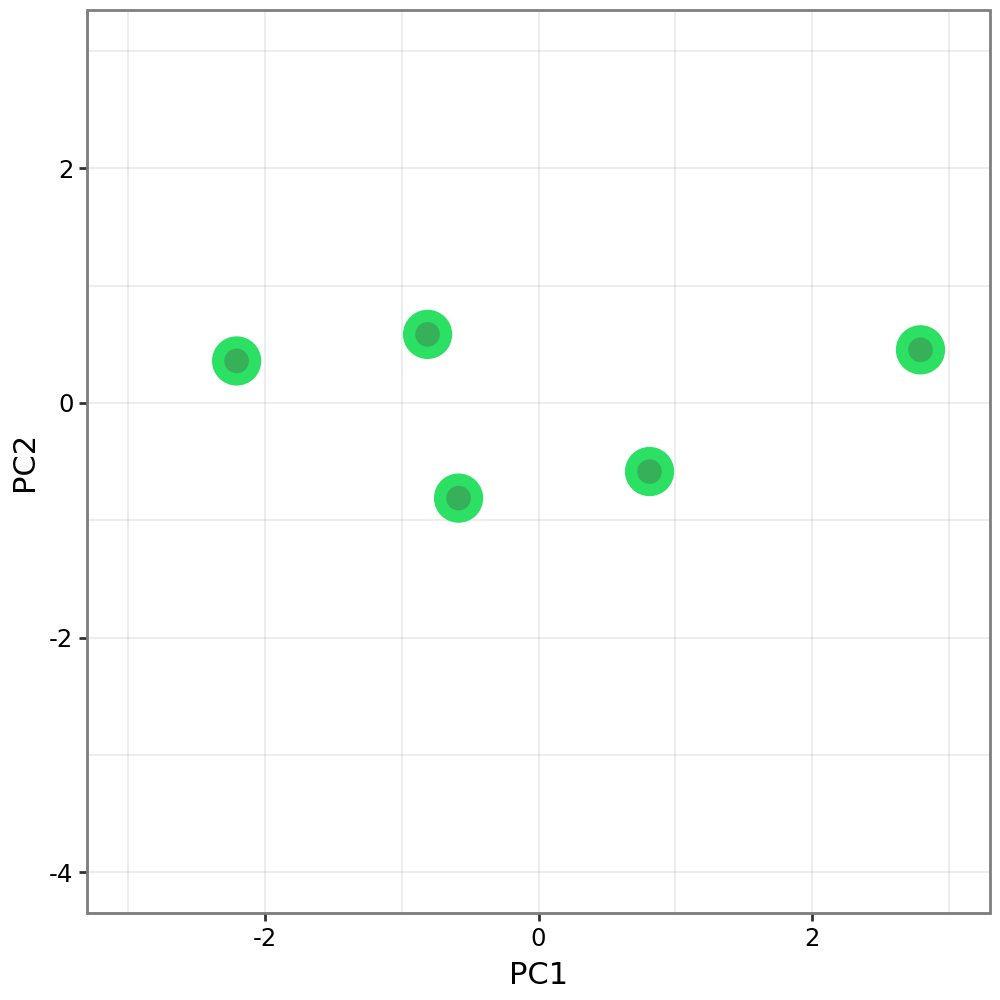

In [34]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## PCA with `sklearn`
Of course, you guessed it, `sklearn` can do it for you.

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #choose the number of components = number of original dimensions

# use PCA on our data
pca.fit(Z) # Z has already been normalised

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
# btw how do we explore the object structure?
dir(pca)

In [38]:
pca_eigenvectors = pca.components_

##### YOUR CODE STARTS #####
# extract eigenvalues from the pca object
pca_eigenvalues = pca.explained_variance_
##### YOUR CODE ENDS #####

print("Sklearn computed eigenvalues:")
print(pca_eigenvalues)
print("Sklearn computed eigenvectors (in rows):")
print(pca_eigenvectors)

Sklearn computed eigenvalues:
[3.58113883 0.41886117]
Sklearn computed eigenvectors (in rows):
[[ 0.81124219  0.58471028]
 [-0.58471028  0.81124219]]


Transform the original matrix with `sklearn` derived values:

In [40]:
##### YOUR CODE STARTS #####
Z_new = pca_eigenvectors @ Z_t  # note that here we don't need to transpose eigenvectors
##### YOUR CODE ENDS #####

Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2': -np.array(Z_new)[1]})
Z_new_pd

,PC1,PC2
0,-2.791905,0.453064
1,-0.811242,-0.584710
2,0.584710,-0.811242
3,0.811242,0.584710
4,2.207195,0.358178


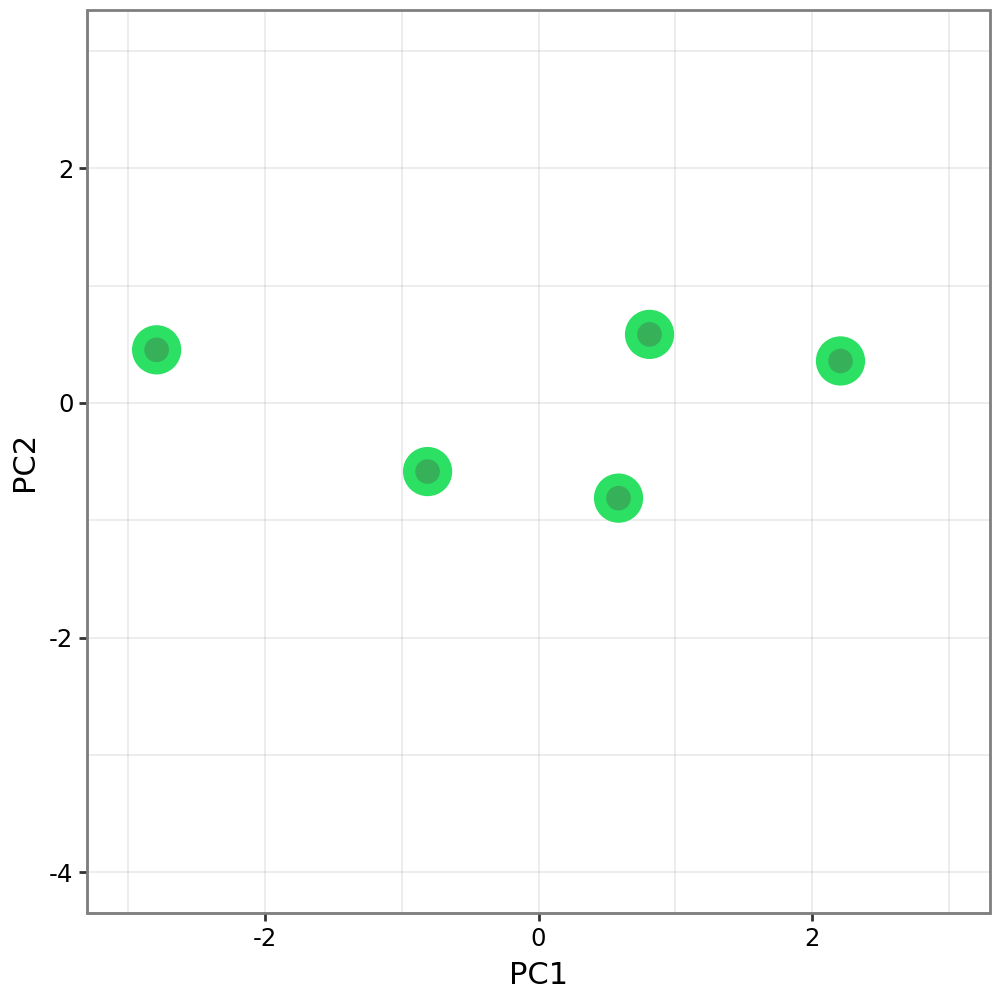

In [41]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## Shorter way to use PCA from `sklearn`

In [ ]:
pca = PCA(n_components=2)

# We `fit` PCA on our data
pca.fit(Z)

# Now we use it to transform any data,
# including matrix it was fitted on
Z_new = pca.transform(Z).T

# Even shorter way:
#Z_new = pca.fit_transform(Z).T
# you can do it on train data, but should not do on val/test, why?


# Eigenvectors should be calculated on train data and the same vectors used to transform test/validation data set
# 	* Fit and transform on train data
# 	* Only transform on test/validation data

<font color=purple size=4>**Question**: Why this is better to `fit` the PCA before applying `transform` function?
</font>

That is it :)

In [46]:
Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2': -np.array(Z_new)[1]})
Z_new_pd

,PC1,PC2
0,-2.791905,0.453064
1,-0.811242,-0.584710
2,0.584710,-0.811242
3,0.811242,0.584710
4,2.207195,0.358178


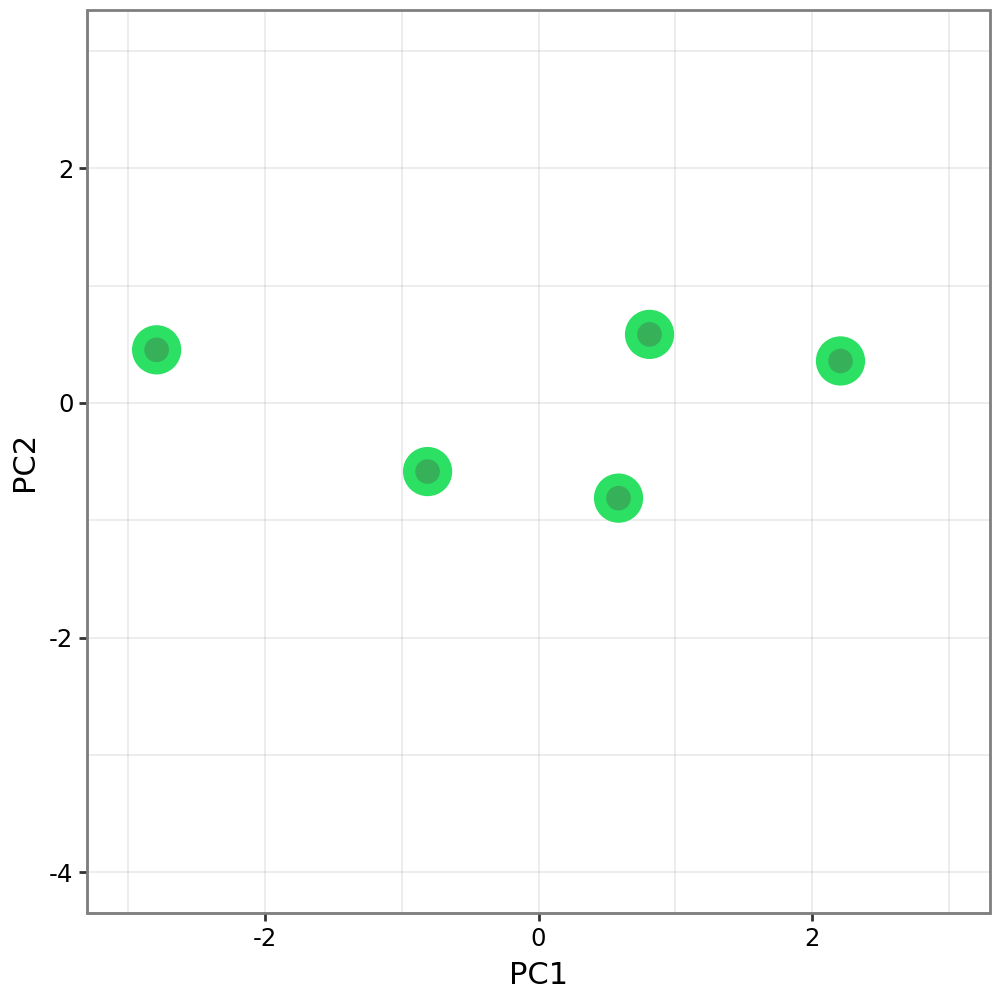

In [47]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

# PCA can improve ML performance on high-dimensional data
Let's see how PCA can help us first to compress the original 1000D data and secondly enable the Decision Tree algorithm perform better.

First, some simple preprocessing.


In [50]:
# we need to drop class and subset variables (we will still have it stored in train)
train_Z = train.drop(['class','subset'], axis=1)

Here we will perform data standardisation which is an integral step in PCA as it helps us to make features with different variance comparable. Although in this case, we have features with equal variance, it still makes sense to start using the same toolkit as you would in real life. More information can be found in this [Sklearn documentation page](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).


In [ ]:
# StandardScaler normalizes data

In [51]:
# Standardise data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # the same as centring but also divides by std

# Fit on training data ony
scaler.fit(train_Z)

# Apply the transform
train_Z = scaler.transform(train_Z)

Let's do the PCA on training data

In [52]:
pca_1000D = PCA()

# 'fit' PCA on training data
pca_1000D.fit(train_Z)

# Transform the original coordinates into PC space
train_Z_new = pca_1000D.transform(train_Z).T

In [ ]:
train_Z_new.shape

# its 60 because training data len is 60
# We cannot get more dimetions than there are rows


# On test data the shape will be (40, 40) - because we took 40 elements

(60, 60)

## Quantifying variance explained by PCs

Here, we will try to estimate the number of principle components that are needed to explain 90% of variance (retained information) in our data. Let's print out `explained_variance_` attribute of our `pca` object.

In [59]:
print(np.round(pca_1000D.explained_variance_, 3))

[216.041  21.283  20.532  19.903  19.648  19.162  18.469  18.396  18.055
  17.643  17.583  17.346  17.176  16.909  16.651  16.243  16.226  16.01
  15.66   15.355  15.157  14.982  14.827  14.586  14.349  14.238  14.045
  13.991  13.893  13.519  13.421  13.217  13.153  12.993  12.821  12.641
  12.503  12.286  12.168  11.925  11.831  11.743  11.572  11.204  11.029
  10.948  10.548  10.452  10.318  10.066  10.035   9.697   9.48    9.416
   9.231   9.143   8.924   8.21    8.094   0.   ]


Here we can calculate the total of the variance explained by all PCs

In [54]:
total_ev = np.sum(pca_1000D.explained_variance_)
print(total_ev)

1016.9491525423732


We can divide each value by the sum of all variances to figure out the ratios using attribute `explained_variance_ratio_`

In [55]:
print((pca_1000D.explained_variance_ratio_).round(3))

[0.212 0.021 0.02  0.02  0.019 0.019 0.018 0.018 0.018 0.017 0.017 0.017
 0.017 0.017 0.016 0.016 0.016 0.016 0.015 0.015 0.015 0.015 0.015 0.014
 0.014 0.014 0.014 0.014 0.014 0.013 0.013 0.013 0.013 0.013 0.013 0.012
 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.011 0.011 0.011 0.01  0.01
 0.01  0.01  0.01  0.01  0.009 0.009 0.009 0.009 0.009 0.008 0.008 0.   ]


How many PCs need to be retained in order to explain 90% or more variance of the original data?

In [60]:
cum_vars = pca_1000D.explained_variance_ratio_.cumsum()
print(np.round(cum_vars, 3))

[0.212 0.233 0.254 0.273 0.292 0.311 0.329 0.348 0.365 0.383 0.4   0.417
 0.434 0.451 0.467 0.483 0.499 0.515 0.53  0.545 0.56  0.575 0.589 0.604
 0.618 0.632 0.646 0.659 0.673 0.686 0.699 0.712 0.725 0.738 0.751 0.763
 0.775 0.788 0.8   0.811 0.823 0.834 0.846 0.857 0.868 0.878 0.889 0.899
 0.909 0.919 0.929 0.939 0.948 0.957 0.966 0.975 0.984 0.992 1.    1.   ]


In [61]:
# Get the smallest number of PCs that explains at least 90% of variance
small_pc_num = np.min(np.where(cum_vars >= 0.9)) + 1

print(f'The smallest number of PCs that explains more than 90% of variance is {small_pc_num} out of {len(pca_1000D.explained_variance_ratio_)}')

The smallest number of PCs that explains more than 90% of variance is 49 out of 60


Instead of doing all of this, you could specify the amount of varinace that should be retained from the original data when fitting PCA.

In [62]:
pca_09 = PCA(n_components=small_pc_num) # use 0.9 for the same effect

# 'fit' PCA on training data
pca_09.fit(train_Z)

# Transform the original coordinates into PC space
train_Z_new = pca_09.transform(train_Z).T

Let's first visualise first two principle components

In [63]:
train_Z_new = pd.DataFrame({'PC1':np.array(train_Z_new)[0], 'PC2':np.array(train_Z_new)[1], 'class': train['class']})

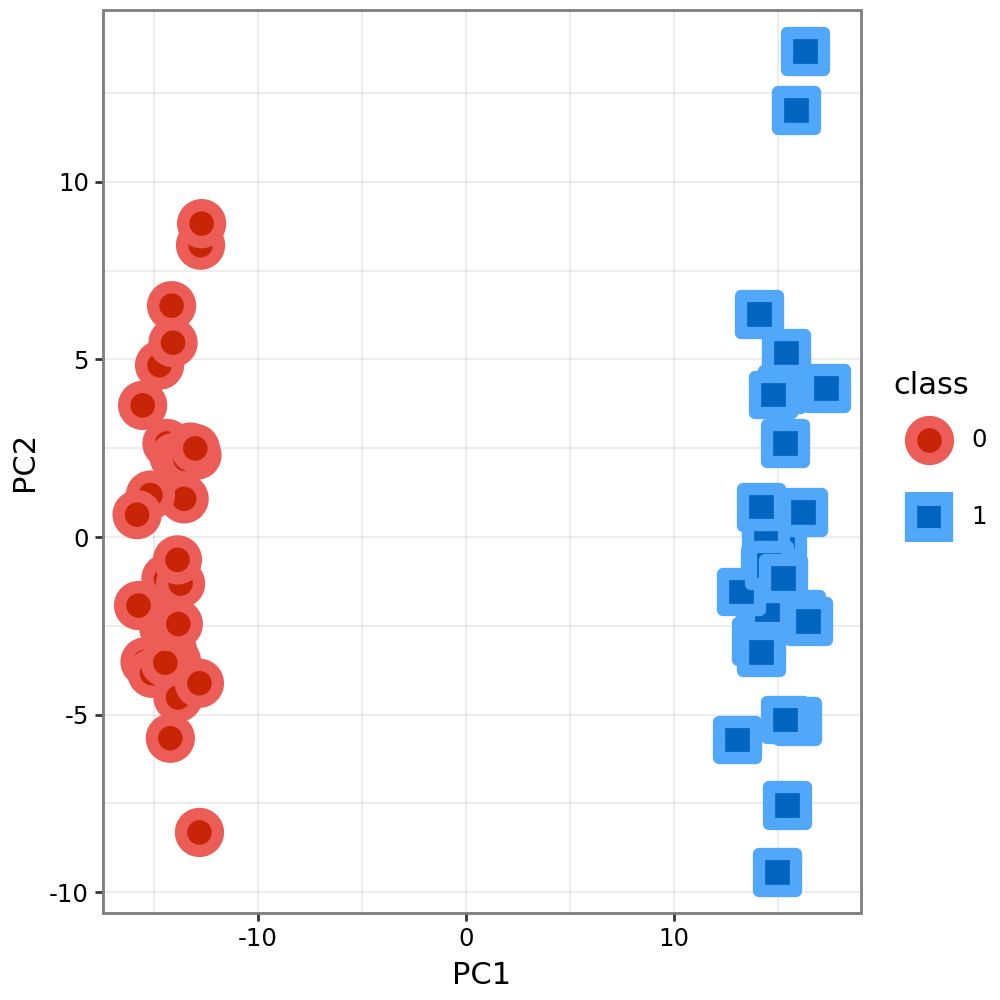

In [64]:
fig = (
    ggplot(data = train_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Performing with validation set all the same operations we performed on train

In [78]:
val_Z = val.drop(['class', 'subset'], axis = 1)

##### YOUR CODE STARTS #####
# Use scaler to standardise validation set the same way we standardised training
val_Z = scaler.transform(val_Z)
##### YOUR CODE ENDS #####

# Use PCA object to transform 'fitted' on training data
val_Z_new = pca_09.transform(val_Z).T


In [79]:
val_Z_new.shape

# We have (49, 40) becuase we have 49 PC-s and 40 rows

(49, 40)

In [80]:
# Save the results
val_Z_new = pd.DataFrame({'PC1':np.array(val_Z_new)[0], 'PC2':np.array(val_Z_new)[1], 'class': val['class']})

Now we can train the model and test its accuracy on validation set

In [81]:
##### YOUR CODE STARTS #####
print(f"Validation accuracy is {train_and_evaluate_with_dim(train_Z_new, val_Z_new, dim = 1) * 100}%")
##### YOUR CODE ENDS #####

Validation accuracy is 100.0%


Wow, that is impressive, but kinda unbelievable, let's visualise! (seeing is believing)

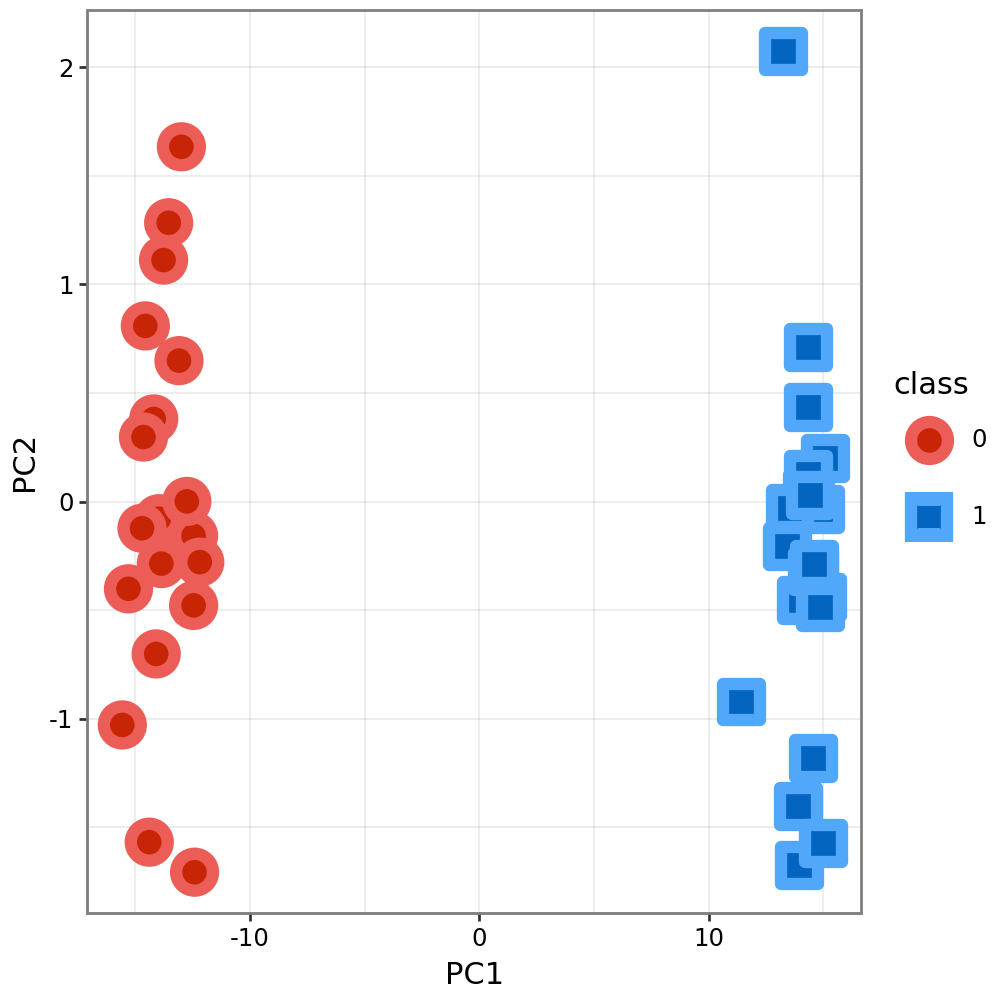

In [82]:
fig = (
    ggplot(data = val_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Not bad!

### Getting our raw data back after PCA

In [97]:
# Conventional PCA
#pca = PCA()
pca = PCA(n_components=0.9)
train_Z_compressed = pca.fit_transform(train_Z)

# Get original data back
train_Z_uncompressed = pca.inverse_transform(train_Z_compressed)

# are the two matrices the same?
print(np.sum(np.abs(train_Z_uncompressed - train_Z)))

14185.870165596303


<font color=purple size=4>**Question**: What happens if we set `n_components` to let's say 0.9? What if I set it to 1.0 instead?
</font>

### Extra experiment - does PCA work well or not if we take less features

We had a discussion in the end of the practice session about why PCA worked so well on this dataset. And we talked about this being partly because we have so many original features that in a combined way help PCA figure out that there are these two separate clusters. But when we have fewer features in the original data, this isn't so evident and the separation shouldn't be that good. You can try to change m (the number of dimensions we keep) and see how it changes.

In [101]:
m = 15

train_m = train.iloc[:,:m]
train_m["class"] = train["class"]
train_Z_m = train_m.drop(['class'], axis=1)

val_m = val.iloc[:,:m]
val_m["class"] = val["class"]
val_Z_m = val_m.drop(['class'], axis=1)

scaler_m = StandardScaler() # the same as centring but also divides by std

# Fit on training data ony
scaler_m.fit(train_Z_m)
# Apply the transform
train_Z_m = scaler_m.transform(train_Z_m)
val_Z_m = scaler_m.transform(val_Z_m)


pca_m = PCA(n_components=0.99) # use 0.9 for the same effect

# 'fit' PCA on training data
pca_m.fit(train_Z_m)

# Transform the original coordinates into PC space
train_Z_m_new = pca_m.transform(train_Z_m).T
val_Z_m_new = pca_m.transform(val_Z_m).T

# Save the results
train_Z_m_new = pd.DataFrame({'PC1':np.array(train_Z_m_new)[0], 'PC2':np.array(train_Z_m_new)[1], 'class': train_m['class']})
val_Z_m_new = pd.DataFrame({'PC1':np.array(val_Z_m_new)[0], 'PC2':np.array(val_Z_m_new)[1], 'class': val['class']})

print(f"Validation accuracy is {train_and_evaluate_with_dim(train_Z_m_new, val_Z_m_new, dim = 1) * 100}%")

Validation accuracy is 90.0%


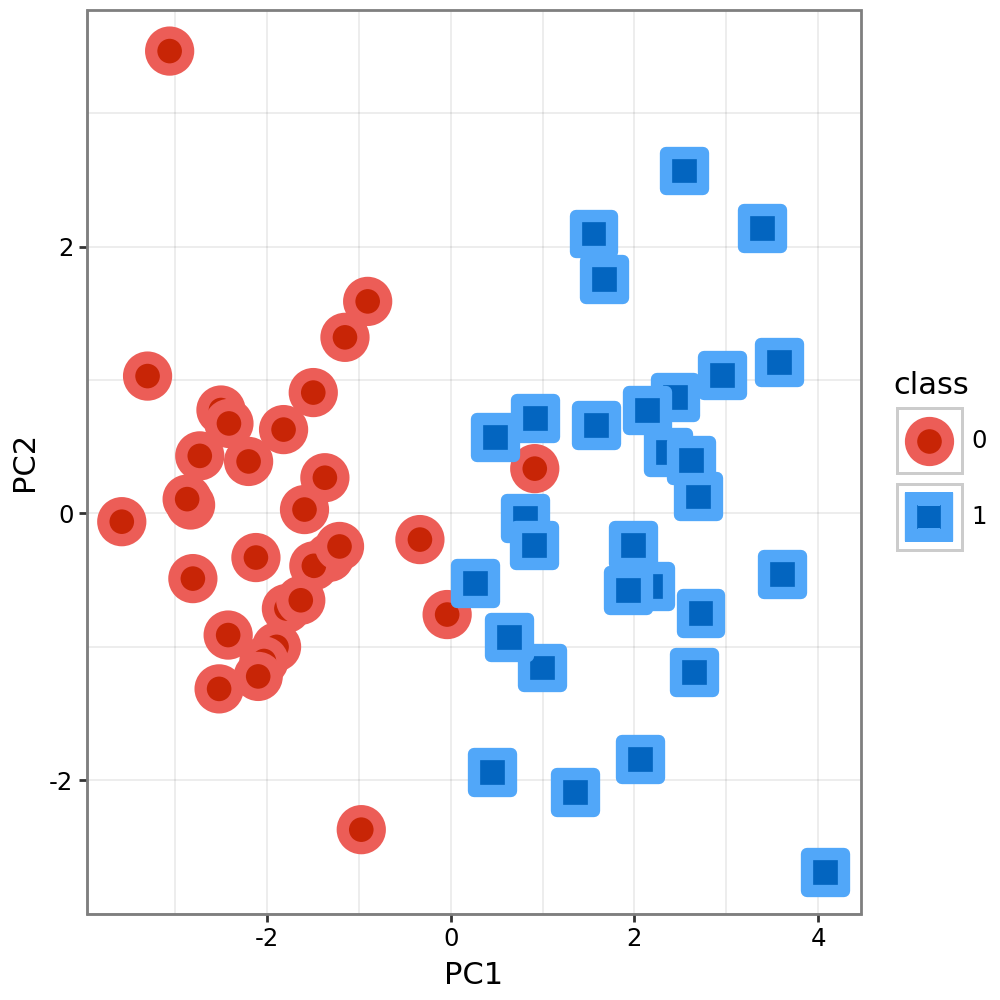

In [102]:
fig = (
    ggplot(data = train_Z_m_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class',
                   shape = 'class',
                   fill = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig